#  The Sparks Foundation
# Graduate Rotational Internship Program


## Prediction using Unsupervised ML
## (Level - Beginner)
## TASK2
## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
## Shourya Nagpal

## Table of Contents
1. [Importing modules and the dataset](#1)
2. [Some Exploratory Data Analysis](#2)
3. [Data cleaning / Prepping](#3)
4. [Model training](#4)
5. [Visualising result](#5)
6. [Conclusion](#6)

<div id='1'></div>

<br>

### *1. Importing modules and the dataset*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
iris = pd.read_csv('irisdata.csv')
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.shape

(150, 6)

In [6]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<div id='2'></div>

<br>

### *2. Some Exploratory Data Analysis*

Text(0.5, 1.0, 'SepalLengthCm of different Iris Species')

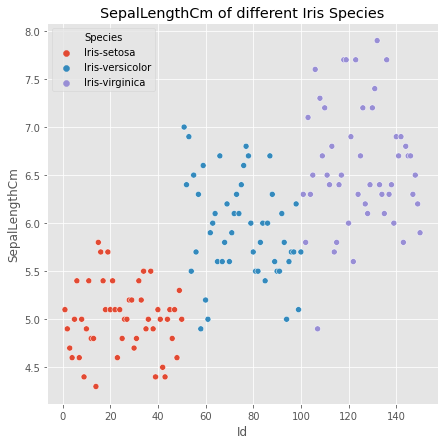

In [7]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
sns.scatterplot(x='Id',y='SepalLengthCm',data=iris,hue='Species')
plt.title('SepalLengthCm of different Iris Species')

Text(0.5, 1.0, 'SepalLengthCm of different Iris Species')

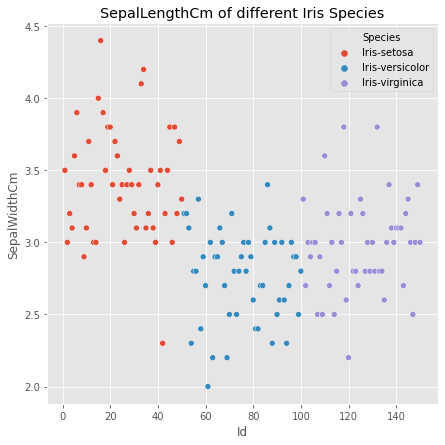

In [8]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
sns.scatterplot(x='Id',y='SepalWidthCm',data=iris,hue='Species')
plt.title('SepalLengthCm of different Iris Species')

Text(0.5, 1.0, 'SepalLengthCm of different Iris Species')

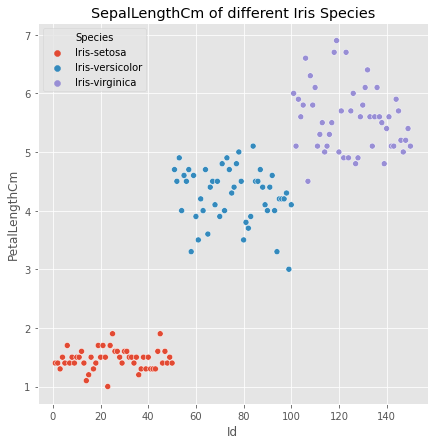

In [9]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
sns.scatterplot(x='Id',y='PetalLengthCm',data=iris,hue='Species')
plt.title('SepalLengthCm of different Iris Species')

Text(0.5, 1.0, 'SepalLengthCm of different Iris Species')

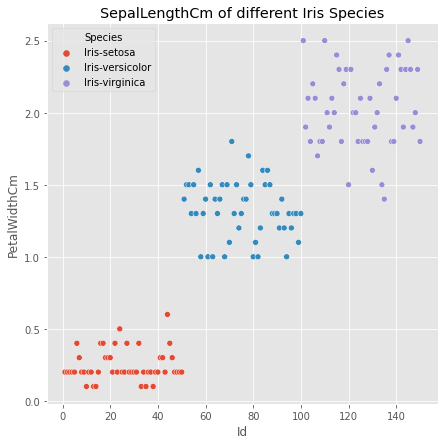

In [10]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
sns.scatterplot(x='Id',y='PetalWidthCm',data=iris,hue='Species')
plt.title('SepalLengthCm of different Iris Species')

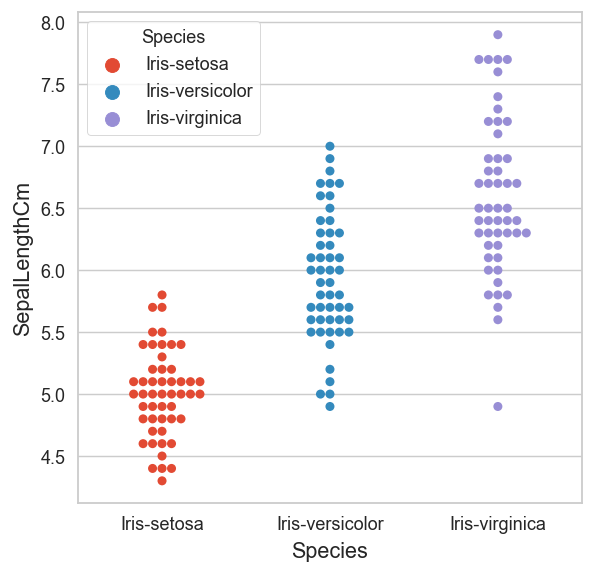

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5),dpi=130)
sns.swarmplot(x='Species',y='SepalLengthCm',hue='Species',data=iris)
plt.show()

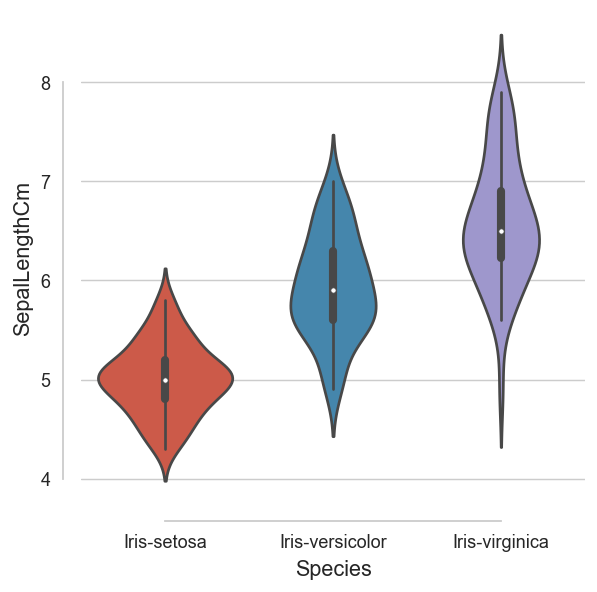

In [12]:
f, ax = plt.subplots(figsize=(5,5),dpi=130)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
sns.despine(offset=10, trim=True);

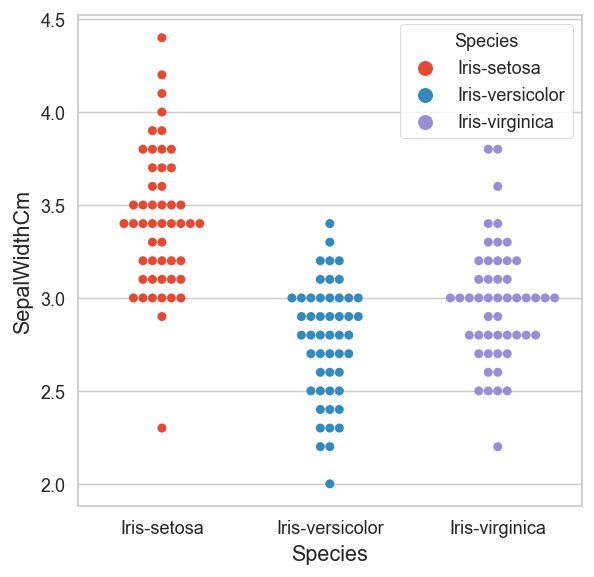

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5),dpi=130)
sns.swarmplot(x='Species',y='SepalWidthCm',hue='Species',data=iris)
plt.show()

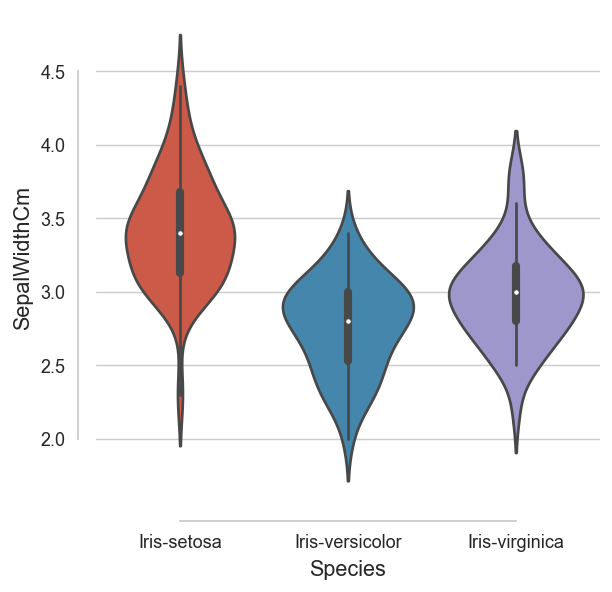

In [14]:
f, ax = plt.subplots(figsize=(5,5),dpi=130)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
sns.despine(offset=10, trim=True);

c:\users\shaurya\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


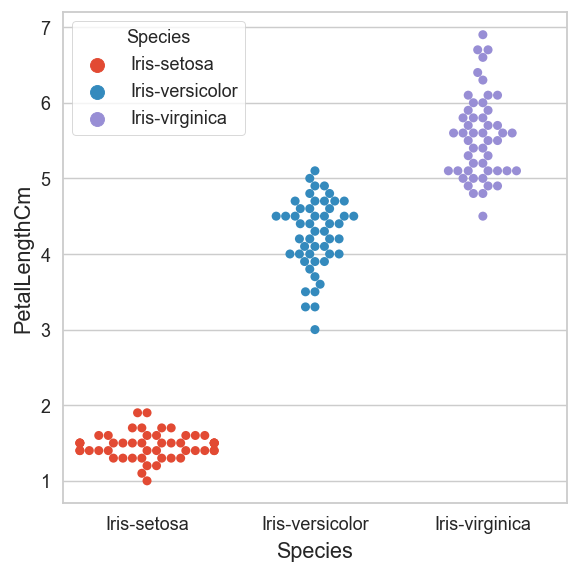

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5),dpi=130)
sns.swarmplot(x='Species',y='PetalLengthCm',hue='Species',data=iris)
plt.show()

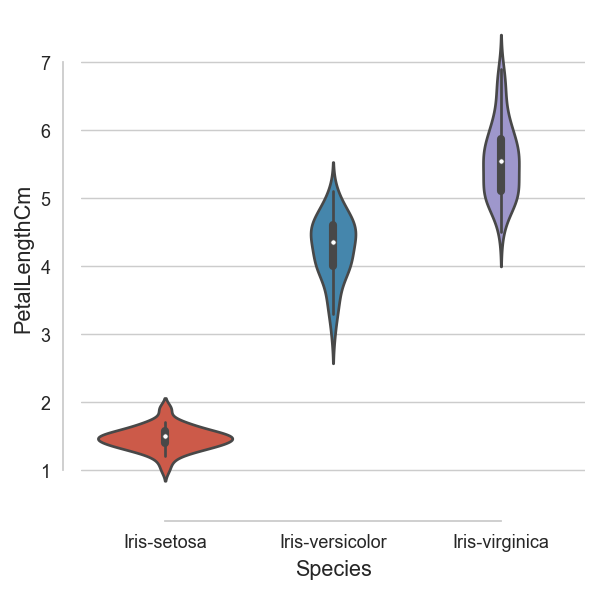

In [16]:
f, ax = plt.subplots(figsize=(5,5),dpi=130)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
sns.despine(offset=10, trim=True);

c:\users\shaurya\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


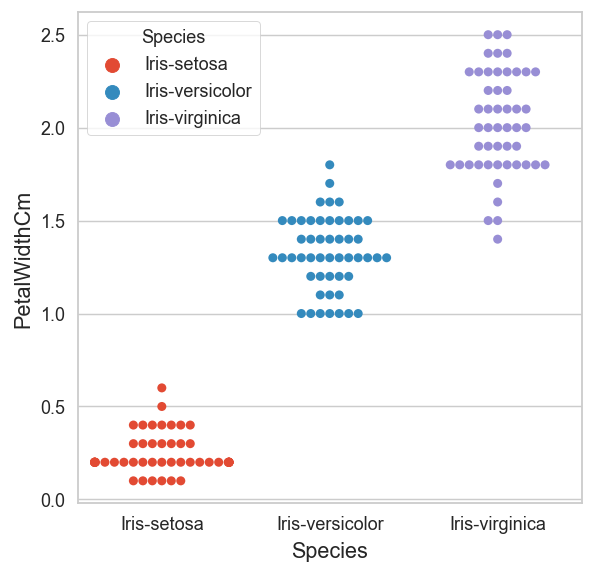

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5),dpi=130)
sns.swarmplot(x='Species',y='PetalWidthCm',hue='Species',data=iris)
plt.show()

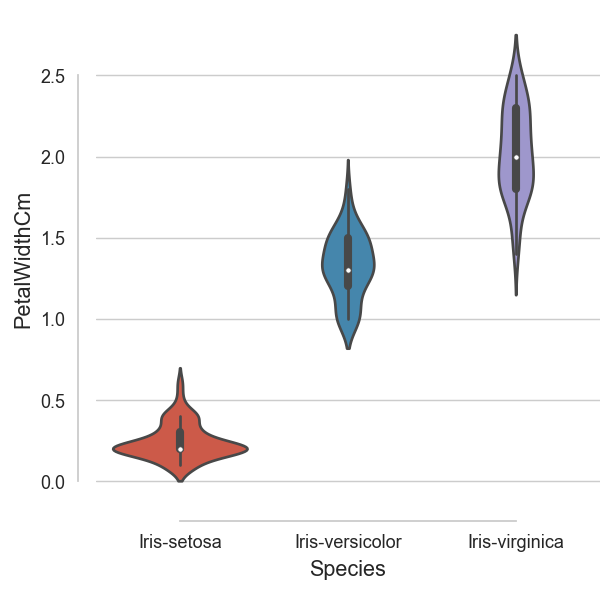

In [18]:
f, ax = plt.subplots(figsize=(5,5),dpi=130)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
sns.despine(offset=10, trim=True);

<div id='3'></div>

<br>

### *3. Data cleaning / Prepping*

In [19]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
samples = iris.drop(['Species'],axis=1)
samples.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


<div id='4'></div>

<br>

### *4. Model training*

### Using K Means

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)

In [22]:
kmeans.fit(samples)

KMeans(n_clusters=3)

In [23]:
Y = iris['Species']

In [24]:
labels = kmeans.predict(samples)

In [25]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [26]:
inertia =[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(samples)
    inertia.append(kmeans.inertia_)

In [27]:
inertia


[281918.32439999987,
 70616.29893333331,
 31326.886800000007,
 17798.00872807018,
 11440.794903225811,
 7913.140425641028,
 5905.83028533785,
 4573.222868421052,
 3587.220904411763]

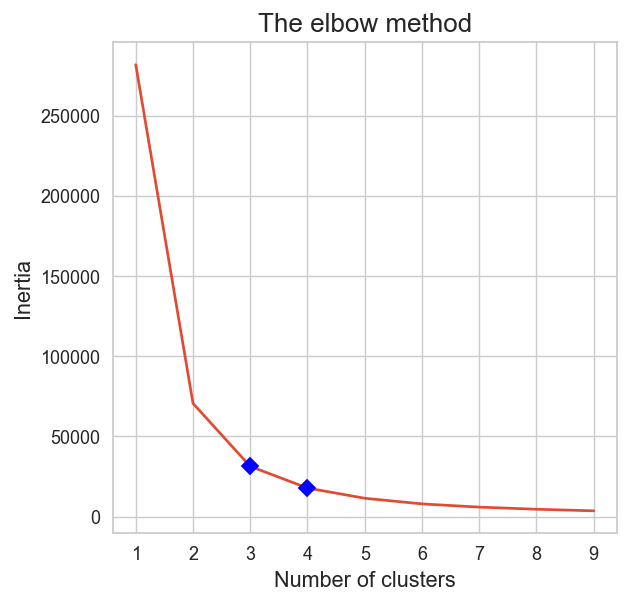

In [28]:
plt.figure(figsize=(5,5),dpi=130)
plt.plot(range(1, 10), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.plot(3,inertia[2],color='blue',marker='D')
plt.plot(4,inertia[3],color='blue',marker='D')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(iris,test_size=0.3)
train.shape,test.shape

((105, 6), (45, 6))

In [30]:
x_train =  train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train['Species']

x_test =  test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test =  test['Species']

### Using KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9555555555555556


### Using Descision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.9555555555555556


<div id='5'></div>

<br>

### *5.Visualising Result*

In [34]:
kmeans = KMeans(3)
kmeans.fit(samples)

clusters = kmeans.fit_predict(samples)

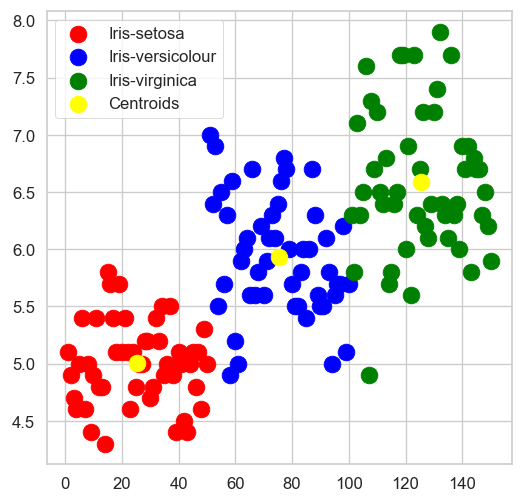

In [41]:
# Visualising the clusters - On the first two columns
x = iris.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(5,5),dpi=120)
# Visualising the clusters - On the first two columns
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<div id='6'></div>

<br>

### *6. Conclusion*

The Iris Data Set Consists of 3 Clusters with labels 1.Iris Setosa  2.Iris Versicolour  3.Iris Virginica